# EDA
## Exploratory Data Analysis

Exploratory data analysis (EDA) is a critical initial step in the data science workflow. It involves using Python libraries to inspect, summarize, and visualize data to uncover trends, patterns, and relationships.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1st import dataset

In [60]:
df = sns.load_dataset("titanic")

# 2nd bigger picture of data

In [61]:
df.shape

(891, 15)

In [62]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [63]:
df.info()         # Data types and non-null counts
df.describe()     # Summary statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [64]:
df.head()        # First 5 rows

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 3rd info give detail of missing valus

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [66]:
# give sum of null values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [67]:
df.duplicated().sum()  # Check for duplicate rows

np.int64(107)

## Agr kis colomn ki missing value 75% hai to esy coloumn ko mostly delete karna chahiye 

In [68]:
# Rounded percentages of missing values
missing_percentage = ((df.isnull().sum() / len(df)) * 100).round(2)
print(missing_percentage)


survived        0.00
pclass          0.00
sex             0.00
age            19.87
sibsp           0.00
parch           0.00
fare            0.00
embarked        0.22
class           0.00
who             0.00
adult_male      0.00
deck           77.22
embark_town     0.22
alive           0.00
alone           0.00
dtype: float64


# Identify Missing Values

In [69]:
print(df.isnull().sum())  # Count missing values per column
print(df.isnull().mean() * 100)  # Percentage of missing values


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


In [70]:
df['age'].max() # Maximum age



np.float64(80.0)

**Handling missing** values is an important step in Exploratory Data Analysis (EDA). Here are several strategies to deal with missing values:

---

### 1. **Understand the Nature of Missing Values**
   - **Completely Missing at Random (MCAR):** Missing values are independent of both observed and unobserved data.
   - **Missing at Random (MAR):** Missing values depend on other observed data.
   - **Not Missing at Random (NMAR):** Missing values depend on the missing data itself.

---

### 2. **Identify Missing Values**
   - Use tools and methods to detect missing values in the dataset:
     ```python
     import pandas as pd
     print(df.isnull().sum())  # Count missing values per column
     print(df.isnull().mean() * 100)  # Percentage of missing values
     ```
   - Visualize missing data:
     ```python
     import seaborn as sns
     import matplotlib.pyplot as plt
     sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
     plt.show()
     ```

---

### 3. **Decide How to Handle Missing Values**
   - **Remove Missing Values:**
     - If the proportion of missing data is small and its removal doesn’t significantly affect the analysis.
     ```python
     df.dropna(inplace=True)  # Remove rows with missing values
     df.dropna(axis=1, inplace=True)  # Remove columns with missing values
     ```

   - **Impute Missing Values:**
     - Numerical Data:
       - Mean: For normally distributed data.
         ```python
         df['column'].fillna(df['column'].mean(), inplace=True)
         ```
       - Median: For skewed data.
         ```python
         df['column'].fillna(df['column'].median(), inplace=True)
         ```
       - Mode: For categorical data.
         ```python
         df['column'].fillna(df['column'].mode()[0], inplace=True)
         ```
     - Categorical Data:
       - Replace with mode or "Unknown."
         ```python
         df['column'].fillna("Unknown", inplace=True)
         ```

   - **Forward/Backward Fill:**
     - Use for time-series data.
     ```python
     df.fillna(method='ffill', inplace=True)  # Forward fill
     df.fillna(method='bfill', inplace=True)  # Backward fill
     ```

   - **Predict Missing Values:**
     - Use predictive modeling techniques (e.g., regression or machine learning) to estimate missing values.

   - **Flag Missing Values:**
     - Create a new column indicating where missing values were imputed.
     ```python
     df['column_missing'] = df['column'].isnull().astype(int)
     ```

---

### 4. **Drop Columns with Excessive Missing Data**
   - If a column has more than a certain threshold (e.g., 50%) of missing values, consider dropping it.
   ```python
   df.drop(columns=['column'], inplace=True)
   ```

---

### 5. **Use Advanced Imputation Techniques**
   - **K-Nearest Neighbors (KNN) Imputation:**
     ```python
     from sklearn.impute import KNNImputer
     imputer = KNNImputer(n_neighbors=5)
     df.iloc[:, :] = imputer.fit_transform(df)
     ```
   - **Multivariate Imputation:**
     - Leverage multiple variables to impute missing values.

---

### 6. **Document Your Process**
   - Clearly document the method used to handle missing values.
   - Note any potential biases introduced by imputation.

---

### Choosing the Right Method
- **Remove:** If missing values are minimal or irrelevant.
- **Impute:** When retaining the data is important.
- **Predict:** For datasets where accuracy is critical.

## Graph for missing values

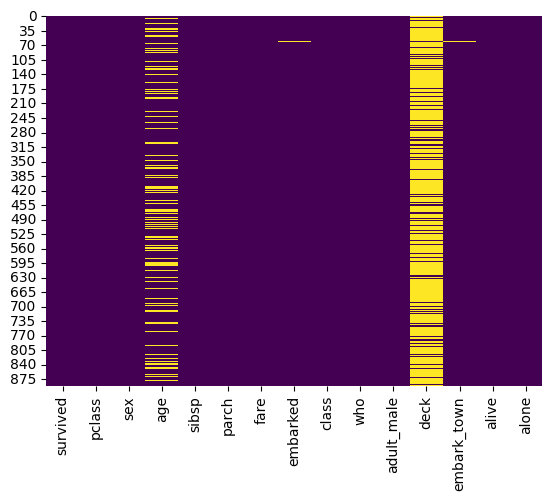

In [71]:
# graph for missing value
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()


In [72]:
df['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [73]:
df['age'].max()

np.float64(80.0)

# Mean Imputation for numerical data

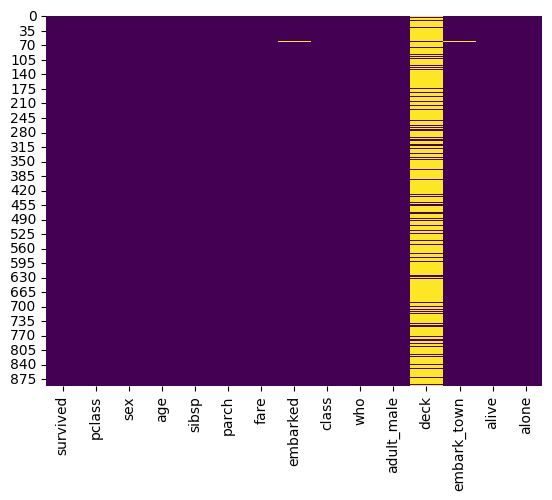

In [74]:
# Create a new DataFrame with 'age' column missing values filled
df2 = df.copy()  # Create a copy of the original DataFrame
df2['age'] = df2['age'].fillna(df2['age'].mean())  # Fill missing values in 'age'

# Plot the heatmap for missing values in the new DataFrame
sns.heatmap(df2.isnull(), cbar=False, cmap="viridis")
plt.show()


In [75]:
df2.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [76]:
df2 = df2.drop(columns=['deck'])

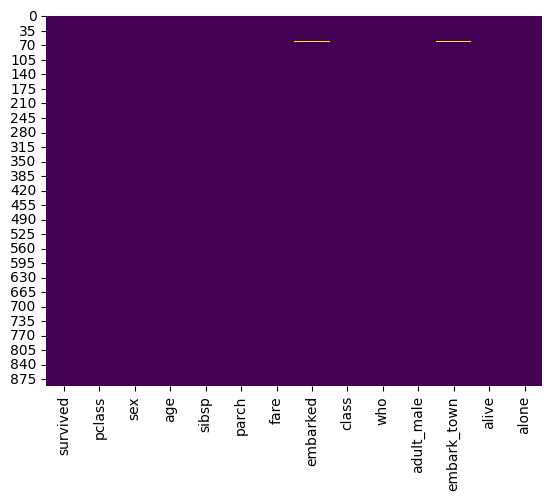

In [77]:
sns.heatmap(df2.isnull(), cbar=False, cmap="viridis")
plt.show()

In [78]:
df3 = df2.copy()

<Axes: >

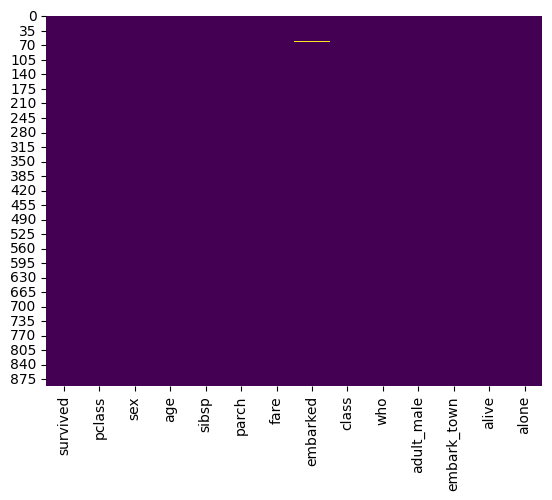

In [79]:
df3.fillna({'embark_town': df3['embark_town'].mode()[0]}, inplace=True)
sns.heatmap(df3.isnull(), cbar=False, cmap="viridis")

In [80]:
# Correct way to fill missing values in 'embarked' column
df3['embarked'] = df3['embarked'].fillna(df3['embarked'].mode()[0])


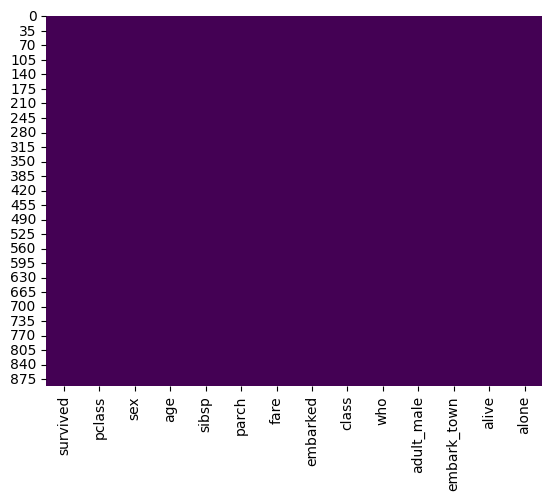

In [81]:
sns.heatmap(df3.isnull(), cbar=False, cmap="viridis")
plt.show()

In [83]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292


# Step:
1. Import liberries
2. Import dataset
3. Explore your data
   1. Information
   2. Data Type
   3. Info
   4. missing values
   5. Take sense of your data
4. Understading the varibles
5. Relationship between the varible (pairplot)
6. Brainstorming
   1. Normalize
   2. Removing Outliers
7. Cleaned Data Ho jata ha yaha
8. Ready for Statistical Analysis
9. Ready for ML
10. Ready for Prediction